In [1]:
# 목적: SQL 기반 평균 매출 분석이 안정적인 패턴인지
# Python std 분석으로 검증한다

In [2]:
import pandas as pd

#노트북 위치 기준 상대 경로로 데이터로드
df=pd.read_csv("../data/sales.csv")

#데이터 구조 확인
df.head()

,id,product,price,sales,category
0,0,latte,4500,2,Beverage
1,1,cake,5500,16,Dessert
2,2,tea,2500,9,Dessert
3,3,latte,4500,44,Beverage
4,4,salad,6000,6,Food


In [3]:
#각 행의 매출(price*sales) 컬럼 추가
df["revenue"] = df["price"] * df["sales"]

#잘 만들어졌는지 확인
df[["product", "price", "sales", "revenue", "category"]].head()

,product,price,sales,revenue,category
0,latte,4500,2,9000,Beverage
1,cake,5500,16,88000,Dessert
2,tea,2500,9,22500,Dessert
3,latte,4500,44,198000,Beverage
4,salad,6000,6,36000,Food


In [4]:
# 상품별 매출 평균과 표준편차 계산
product_stats = (
    df.groupby("product")["revenue"]
    .agg(
        mean_revenue="mean",
        std_revenue="std",
        count="count"
    )
    .reset_index()
)

product_stats.sort_values("mean_revenue", ascending=False)

,product,mean_revenue,std_revenue,count
6,salad,160474.576271,95022.566454,59
7,sandwich,156910.000000,83354.583753,50
1,cake,153140.625000,82048.982116,64
5,latte,130342.105263,71909.364946,57
0,americano,122232.558140,52780.243963,43
4,juice,107642.857143,52671.340688,56
2,coffee,78720.000000,46101.060238,50
8,tea,60140.845070,40073.341967,71
3,cookie,48920.000000,30428.799463,50


In [5]:
#cv(변동계수) = 표준편차 / 평균
product_stats["cv"] = product_stats["std_revenue"] / product_stats["mean_revenue"]

#정렬 : 변동성이 큰 상품순
product_stats.sort_values("cv",ascending=False)

,product,mean_revenue,std_revenue,count,cv
8,tea,60140.845070,40073.341967,71,0.666325
3,cookie,48920.000000,30428.799463,50,0.622011
6,salad,160474.576271,95022.566454,59,0.592135
2,coffee,78720.000000,46101.060238,50,0.585633
5,latte,130342.105263,71909.364946,57,0.551697
1,cake,153140.625000,82048.982116,64,0.535775
7,sandwich,156910.000000,83354.583753,50,0.531225
4,juice,107642.857143,52671.340688,56,0.489316
0,americano,122232.558140,52780.243963,43,0.431802


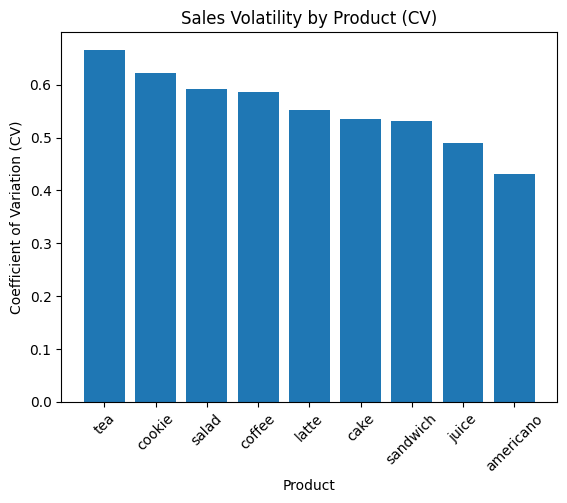

In [6]:
import matplotlib.pyplot as plt

# CV 기준 내림차순 정렬
cv_df = product_stats.sort_values("cv", ascending=False)

# Bar chart
plt.figure()
plt.bar(cv_df["product"], cv_df["cv"])
plt.xticks(rotation=45)
plt.xlabel("Product")
plt.ylabel("Coefficient of Variation (CV)")
plt.title("Sales Volatility by Product (CV)")

plt.show()

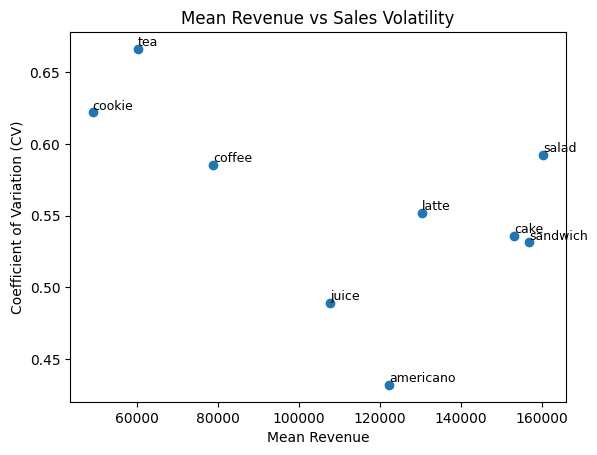

In [7]:
plt.figure()
plt.scatter(
    cv_df["mean_revenue"],
    cv_df["cv"]
)

# 각 점에 상품명 라벨 추가
for _, row in cv_df.iterrows():
    plt.text(
        row["mean_revenue"],
        row["cv"],
        row["product"],
        fontsize=9,
        ha="left",
        va="bottom"
    )

plt.xlabel("Mean Revenue")
plt.ylabel("Coefficient of Variation (CV)")
plt.title("Mean Revenue vs Sales Volatility")

plt.show()